# Loan Application Status Prediction.<br>
## Problem Statement:<br>
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. <br>

Independent Variables:<br>

- Loan_ID<br>
- Gender<br>
- Married<br>
- Dependents<br>
- Education<br>
- Self_Employed<br>
- ApplicantIncome<br>
- CoapplicantIncome<br>
- Loan_Amount<br>
- Loan_Amount_Term<br>
- Credit History<br>
- Property_Area<br>

Dependent Variable (Target Variable):<br>
- Loan_Status<br>

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# IMPORTING DATA AND LIBRARIES.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


There are 614 entries and 13 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 'Loan_Status' are object data types.<br>
'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History' are in float<br.
**Loan_Status** is the target variable.

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values in  'Gender', 'Married', 'Dependents','Self_Employed',LoanAmount, Loan_Amount_Term and Credit_History

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

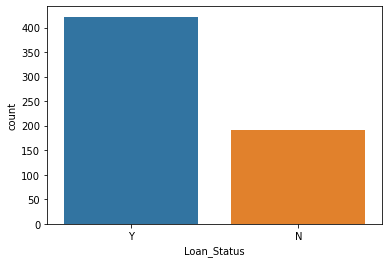

In [6]:
sns.countplot(df['Loan_Status'])

In [7]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

The data is balanced. 

# EDA AND PREPROCESSING

<AxesSubplot:xlabel='Gender', ylabel='count'>

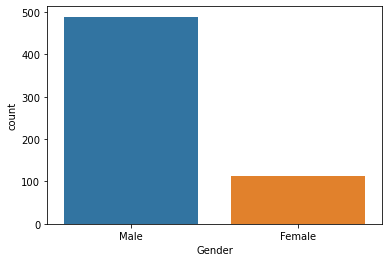

In [8]:
sns.countplot(df['Gender'])

In [9]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

So most people applying for the Loan are Males.

<AxesSubplot:xlabel='Married', ylabel='count'>

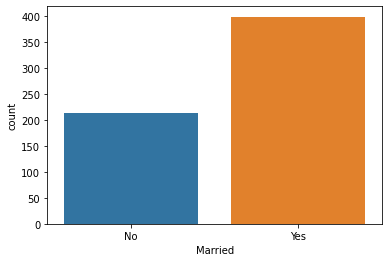

In [10]:
sns.countplot(df['Married'])

In [11]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

There are more number of Married customers.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

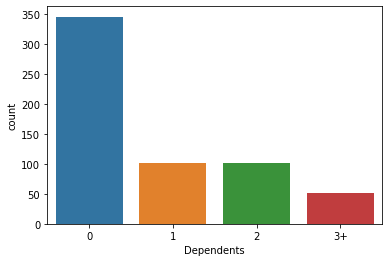

In [12]:
sns.countplot(df['Dependents'])

In [13]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Nearly half of the customers do not have dependents. Very few customers have 3+ dependents.

<AxesSubplot:xlabel='Education', ylabel='count'>

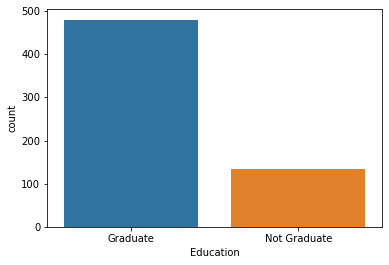

In [14]:
sns.countplot(df['Education'])

In [15]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Most customers are Graduates.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

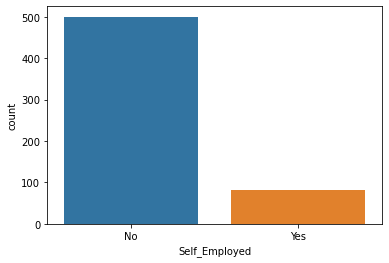

In [16]:
sns.countplot(df['Self_Employed'])

In [17]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Very few customers are self employed.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

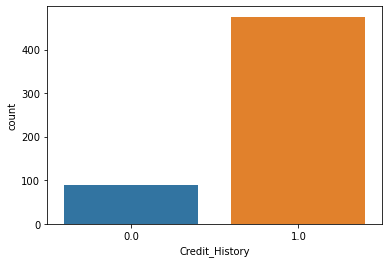

In [18]:
sns.countplot(df['Credit_History'])

In [19]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

This shows that most customers are with more credit history 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

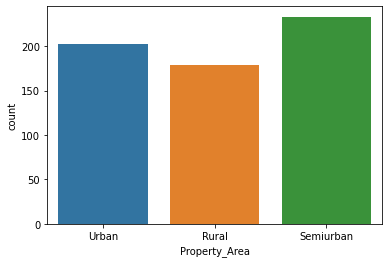

In [20]:
sns.countplot(df['Property_Area'])

In [21]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Nearly all the three categories have same number of entries. However, Semiurban has more entries.

In [22]:
#statistical summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Observations**:<br>
1) ApplicantIncome has a minimum amount of 150. The 75th percentile and max ammount has huge difference. Same goes with min and 25th percentile.<br>
2) CoapplicantIncome has minimum and 25th percentile 0. This can be expected, if there is only one applicant. There is a huge difference in 75th percentile and max ammount.<br>
3) LoanAmount ranges from 9 - 700, however, there is a huge difference in 75th percentile and max ammount.<br>
4) Loan_Amount_Term ranges from 12- 480. 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

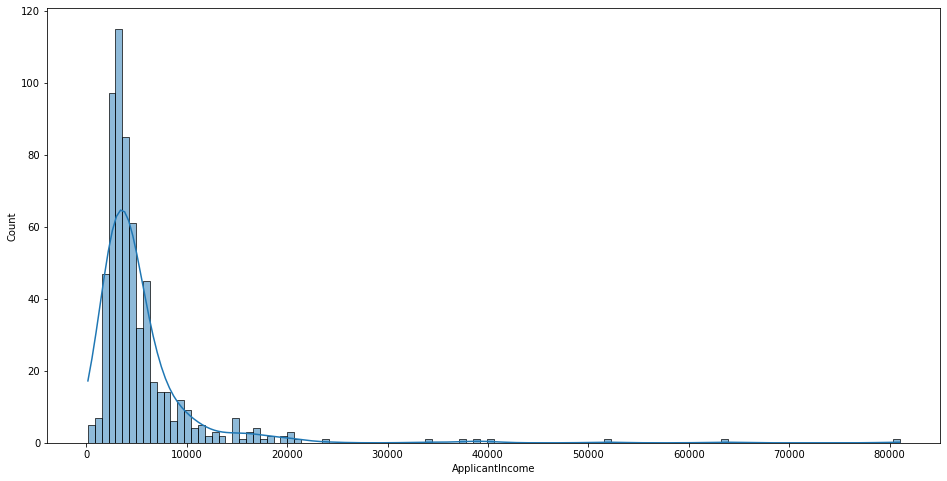

In [23]:
plt.figure(figsize=(16,8))
sns.histplot(df['ApplicantIncome'], kde=True)

Most of the people have the incomes under 10,000.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

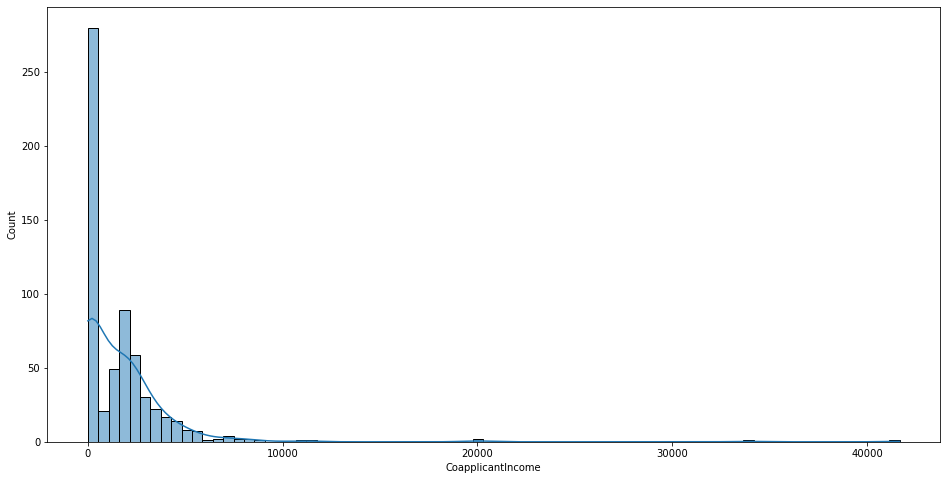

In [24]:
plt.figure(figsize=(16,8))
sns.histplot(df['CoapplicantIncome'], kde=True)

Same here. However, there are coapplicants with 0 income. This suggest no co applicants.

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

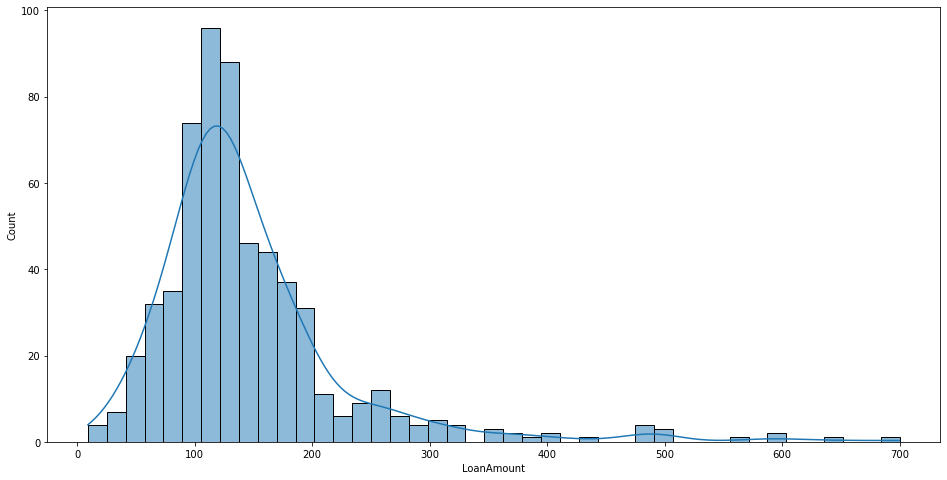

In [25]:
plt.figure(figsize=(16,8))
sns.histplot(df['LoanAmount'], kde=True)

Most loans requested is from 9 - 300 range.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

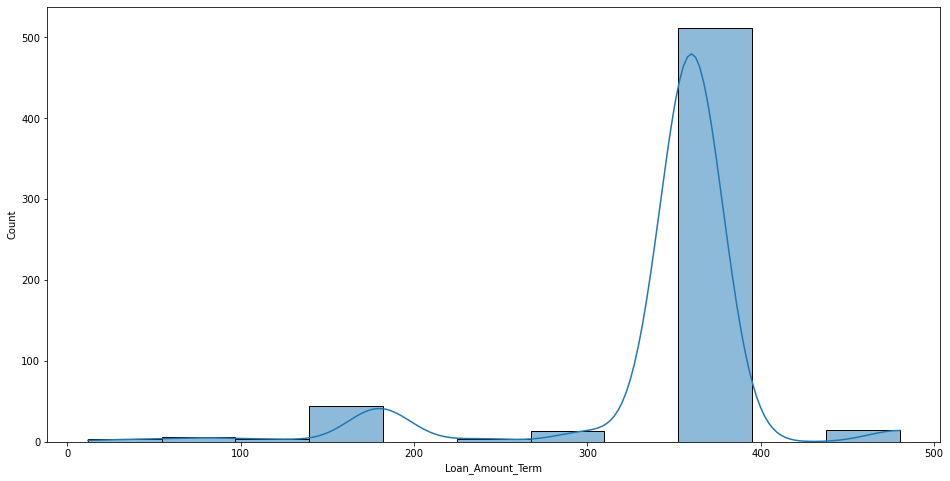

In [26]:
plt.figure(figsize=(16,8))
sns.histplot(df['Loan_Amount_Term'], kde=True)

Most of the loan terms are in range 360-390 

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

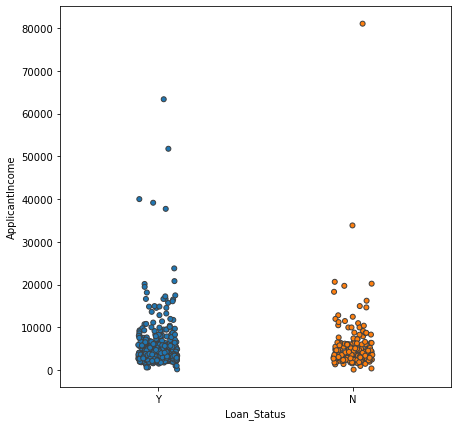

In [27]:
plt.figure(figsize=(7,7))
sns.stripplot(df['Loan_Status'], df['ApplicantIncome'],linewidth=1)

Customers with more Income tend to have yes loan status.

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

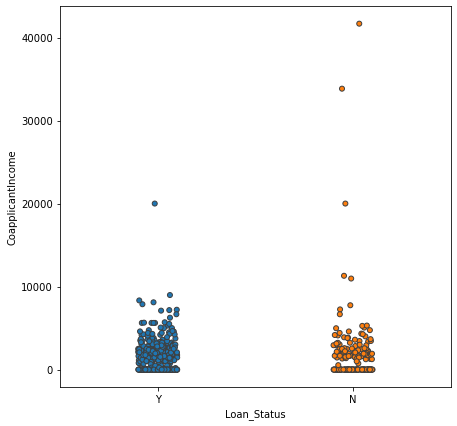

In [28]:
plt.figure(figsize=(7,7))
sns.stripplot(df['Loan_Status'], df['CoapplicantIncome'],linewidth=1)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

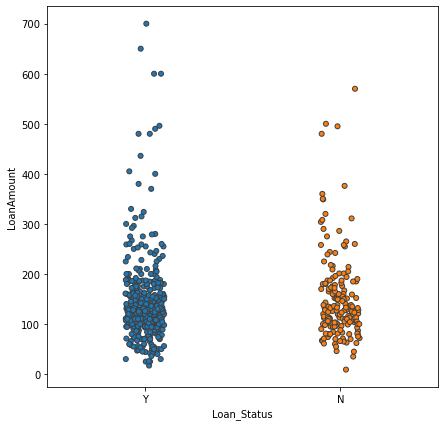

In [29]:
plt.figure(figsize=(7,7))
sns.stripplot(df['Loan_Status'], df['LoanAmount'],linewidth=1)

Both categories for Loan status have same range of loan amount. 

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

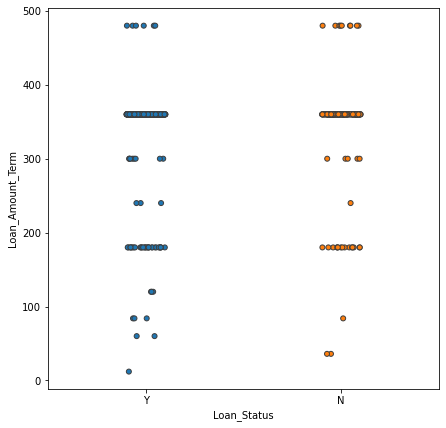

In [30]:
plt.figure(figsize=(7,7))
sns.stripplot(df['Loan_Status'], df['Loan_Amount_Term'],linewidth=1)

Both catagories have same types of ranges.

The main idea of ApplicantIncome and CoapplicantIncome is to understand the total income produced for the loan application. So we will create a new column adding both the columns and look at the dustribution.

In [31]:
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

<AxesSubplot:xlabel='Loan_Status', ylabel='Income'>

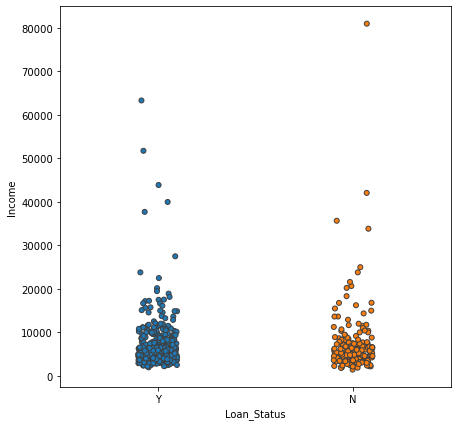

In [32]:
plt.figure(figsize=(7,7))
sns.stripplot(df['Loan_Status'], df['Income'],linewidth=1)

## Treating Missing values.

In [33]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Income                0
dtype: int64

Most of the customers are Male, lets replace the nan values with Male.

In [34]:
df['Gender'] = df['Gender'].replace(np.nan,'Male')

Most of the customers are Married, lets replace the nan values with Yes.

In [35]:
df['Married'] = df['Married'].replace(np.nan,'Yes')

Most of the customers have 0 dependents, lets replace the nan values with 0.

In [36]:
df['Dependents'] = df['Dependents'].replace(np.nan,'0')

Most of the customers have 1.0 as credit history. lets replace the nan values with 1.0.

In [37]:
df['Credit_History'] = df['Credit_History'].replace(np.nan,'1.0')

Most of the customers are not self employed. lets replace the nan values with No.

In [38]:
df['Self_Employed'] = df['Self_Employed'].replace(np.nan,'No')

In [39]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

We can see that for Loan_Amount_Term 360 is repeating the most. We will replace the missing values with 360

In [40]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(np.nan,360)

for LoanAmount we will use the median to make sure the outlier doesn't effect the data imputed.

In [41]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [42]:
df.shape

(614, 14)

In [43]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

## Preprocessing

In [44]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income'],
      dtype='object')

We will drop Loan_ID as this is just an id for loan application and we have no use for this column in model building.

In [45]:
df.drop('Loan_ID', axis=1,inplace=True)

'Gender', 'Married', 'Education', 'Self_Employed' and 'Loan_Status' are two category features.

We will use Label Encoder on Married, Education and Loan_status (As Target Variable). Married, Education have a sense of order to them. Same goes with Dependents.

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])

In [48]:
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [49]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [50]:
df['Dependents'] = df['Dependents'].replace('3+','3')

In [51]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [52]:
df['Dependents'] = df['Dependents'].astype(int)

We will convert the Property_Area column also into a ordinal encoding as in this problem, Urban area may have more property value, then SemiUrban and lastly Rural.

In [53]:
df['Property_Area'] = le.fit_transform(df['Property_Area'])

<AxesSubplot:>

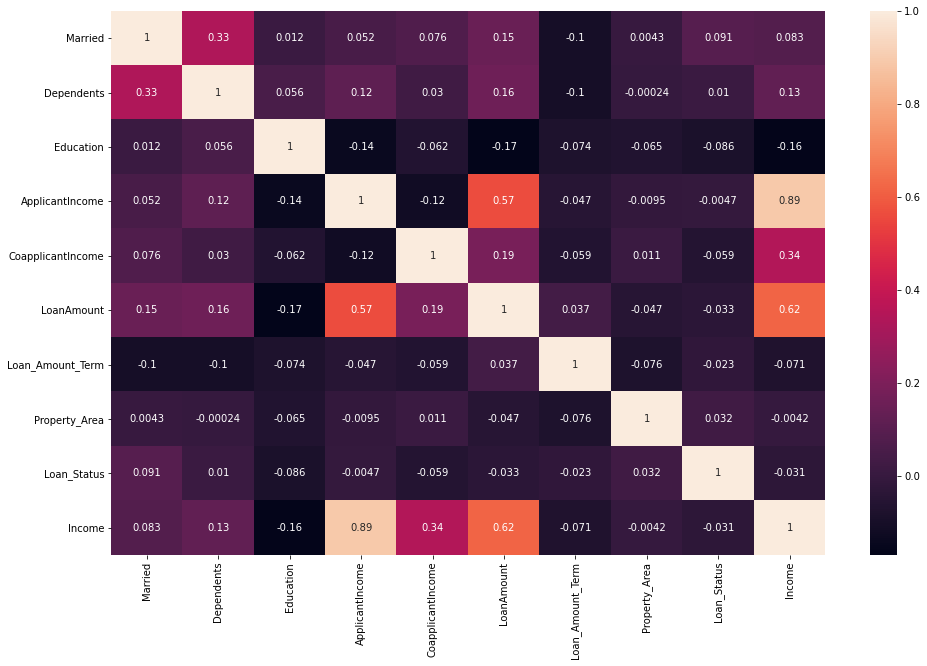

In [54]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

We will now drop ApplicantIncome and CoapplicantIncome columns as they have very low correlation with target variables.

In [55]:
df.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

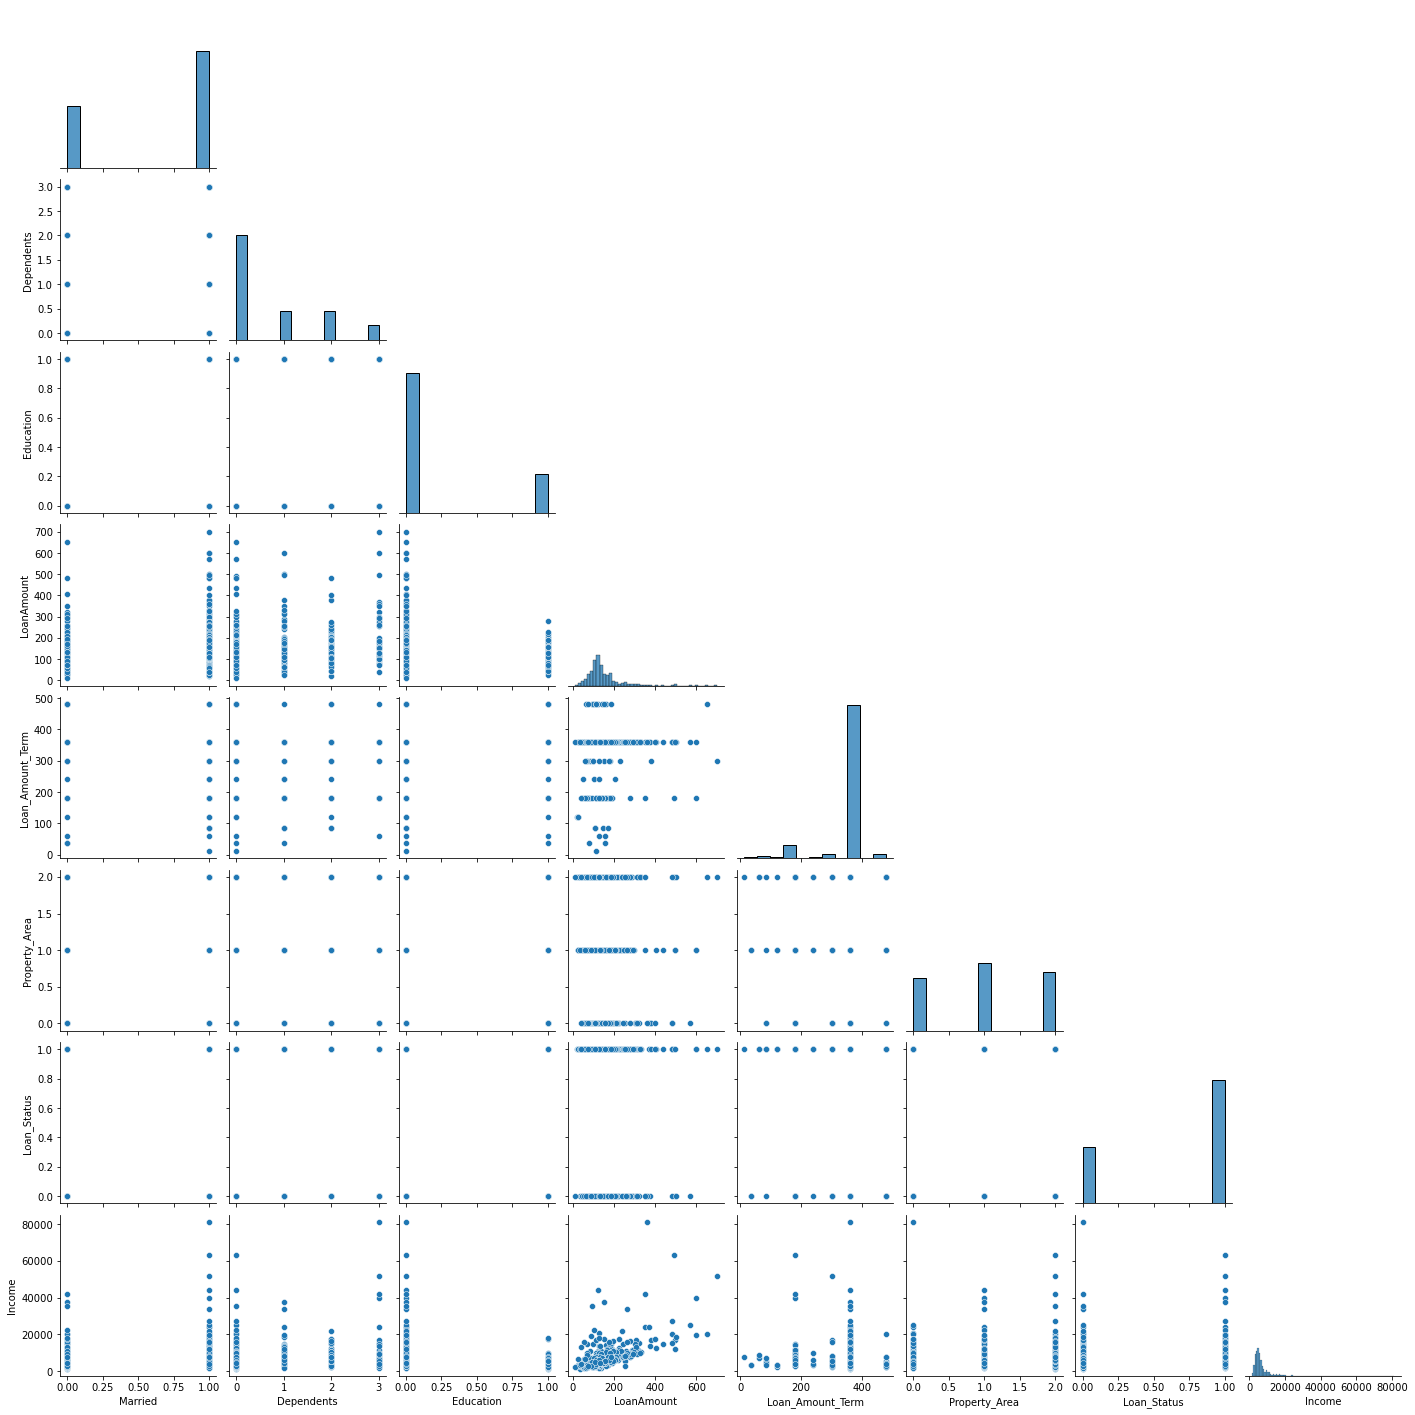

In [56]:
sns.pairplot(df, diag_kind="hist", corner=True)

Credit History is low for customer with low income comparetively.

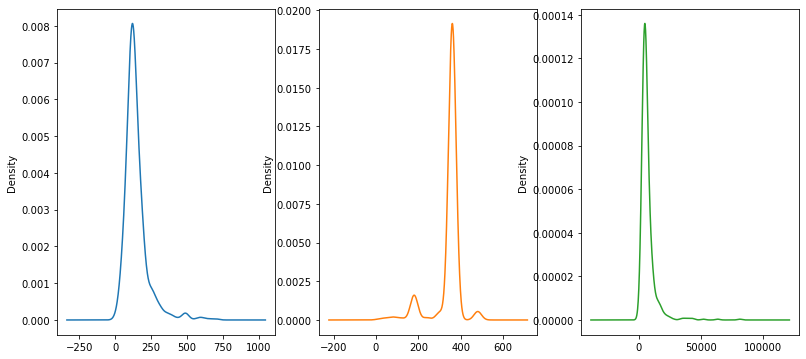

In [57]:
df[['LoanAmount','Loan_Amount_Term', 'Income']].plot(kind="density", subplots =True, layout=(1,4), sharex=False, legend =False, figsize=(18,6))
plt.show()

# OUTLIERS AND SKEWNESS

In [58]:
#function for detecting outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*1.5)
    return(lower_bridge,upper_bridge)

#function for detecting outliers when feature has huge skewness (by IQR)

def outlier_IQR3(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*3)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
    return(lower_bridge,upper_bridge)

#function for detecting outliers when feature has Normally Distributed (by mean-+3dtf)

def outlier_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return(lower_boundary,upper_boundary)

#function for checking data is Normally Distributed by QQ-plot.

from scipy import stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name], dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("Original_dist")
    plt.show()

#function for LOG transformation Technique

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")
        plt.show()

#function for Reciprocal transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name] 
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")
        plt.show()

#function for Square root transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")
        plt.show()

#function for Exponential transformation Technique

def exponential_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/1.2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("exponential_transform")
        plt.show()

#function for Box cox transformation Technique

def boxcox_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = stats.boxcox(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("boxcox_transform")
        plt.show()

def log1p_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    data_frame_copy[feature_name] = np.log1p(data_frame_copy[feature_name])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame_copy[feature_name].hist()
    plt.title("log1p_transform")
    plt.show()

In [59]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Income'],
      dtype='object')

Income, LoanAmount<br>
We will look into outliers and skewness for these columns only as Loan_Amount_Term would be a category feature.

## Income Column

In [60]:
df['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

<AxesSubplot:xlabel='Income', ylabel='Count'>

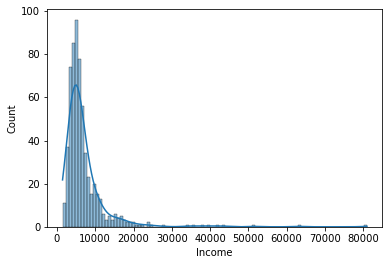

In [61]:
sns.histplot(df['Income'], kde=True)

<AxesSubplot:xlabel='Income'>

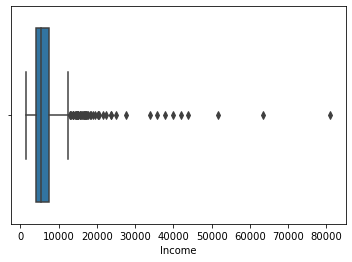

In [62]:
sns.boxplot(df['Income'])

In [63]:
outlier_normally(df, 'Income')

(-12351.2865351683, 26400.696697997744)

In [64]:
df[df['Income']>26868.1123937639].shape

(10, 11)

In [65]:
df = df[df['Income']<=26868.1123937639]

In [66]:
df['Income'].skew()

2.052785088962696

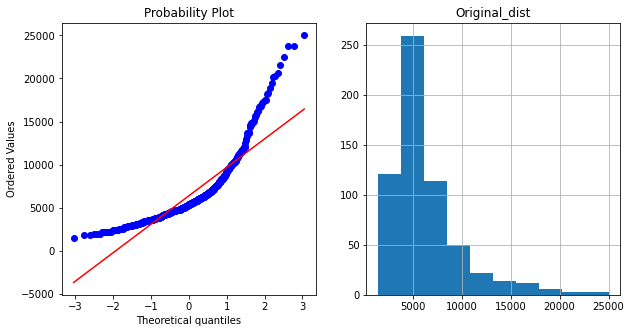

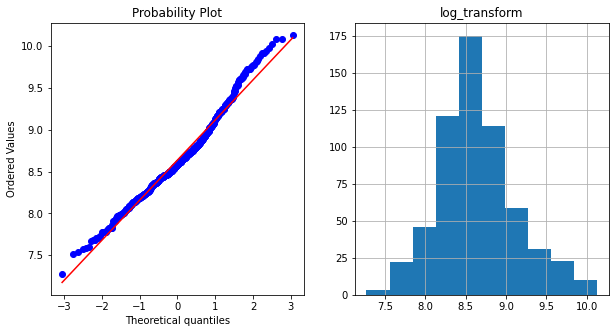

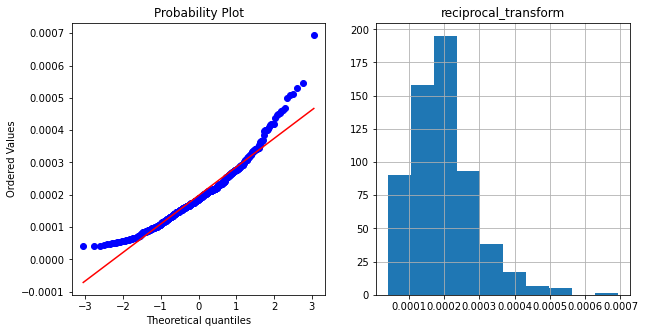

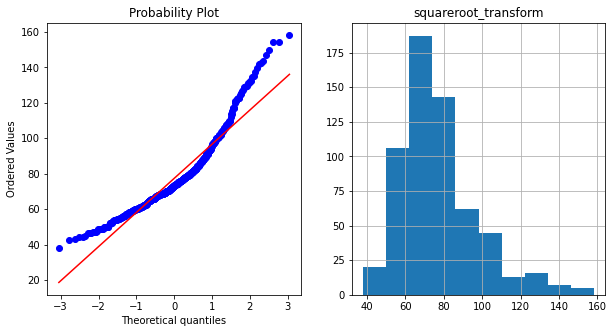

In [67]:
original_dist(df, 'Income')

log_transform(df,'Income')

reciprocal_transform(df,'Income')

squareroot_transform(df,'Income')

In [68]:
df['Income'] = np.log(df['Income'])
df['Income'].skew()

0.49758085444913985

## LoanAmount Column 

In [69]:
df['LoanAmount'].describe()

count    604.000000
mean     142.201987
std       75.973760
min        9.000000
25%      100.000000
50%      128.000000
75%      161.250000
max      650.000000
Name: LoanAmount, dtype: float64

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

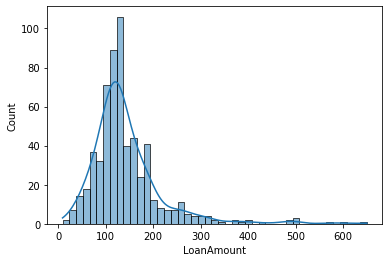

In [70]:
sns.histplot(df['LoanAmount'], kde=True)

<AxesSubplot:xlabel='LoanAmount'>

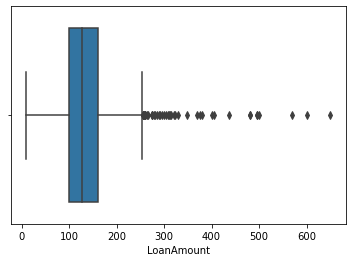

In [71]:
sns.boxplot(df['LoanAmount'])

In [72]:
outlier_normally(df, 'LoanAmount')

(-85.71929310973238, 370.1232666196662)

In [73]:
df[df['LoanAmount']>377.4482037277297].shape

(12, 11)

In [74]:
df = df[df['LoanAmount']<=377.4482037277297]

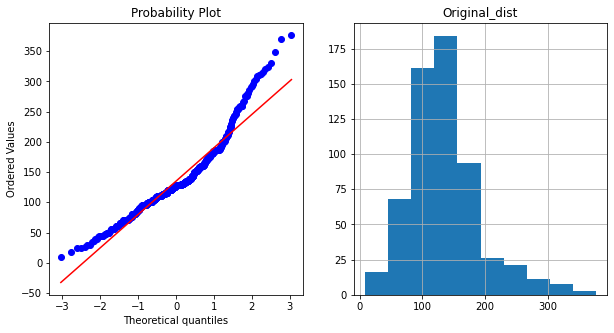

In [75]:
original_dist(df, 'LoanAmount')

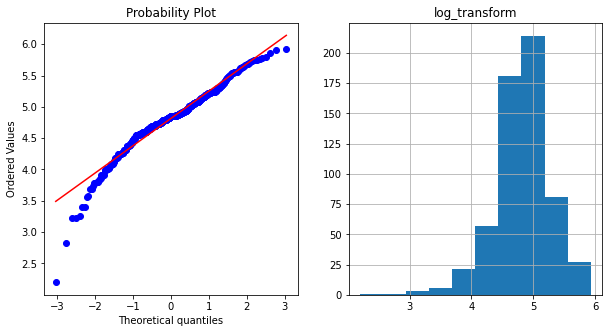

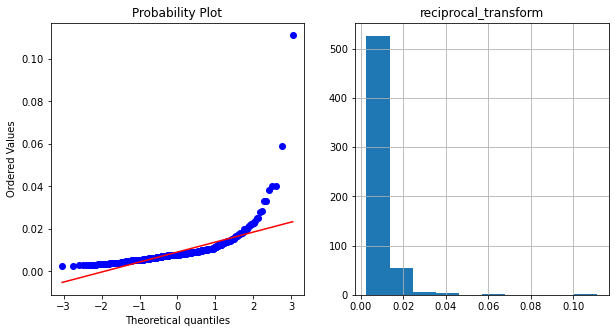

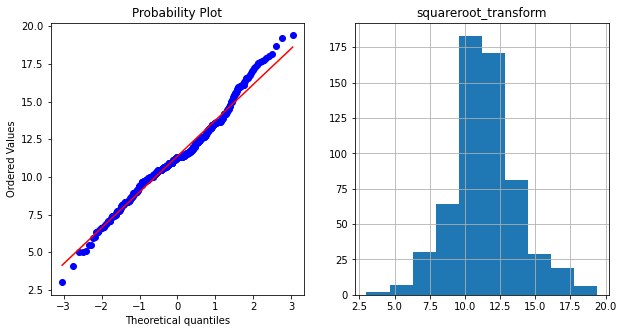

In [76]:
log_transform(df,'LoanAmount')

reciprocal_transform(df,'LoanAmount')

squareroot_transform(df,'LoanAmount')

In [77]:
df['LoanAmount'] = (np.log(df['LoanAmount']))
df['LoanAmount'].skew()

-0.8670823183677855

In [78]:
df.shape

(592, 11)

In [79]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,0,0,0,No,4.852030,360.0,1,2,1,8.674026
1,Male,1,1,0,No,4.852030,360.0,1,0,0,8.714568
2,Male,1,0,0,Yes,4.189655,360.0,1,2,1,8.006368
3,Male,1,0,1,No,4.787492,360.0,1,2,1,8.505323
4,Male,0,0,0,No,4.948760,360.0,1,2,1,8.699515


We lost 3.58 % of data. Now lets use get_dummies method to encode the Gender and Self_employed columns.

## Using get_dummies.

In [81]:
dummies = pd.get_dummies(df[['Gender','Self_Employed']], drop_first=True)

In [82]:
df.drop(['Gender','Self_Employed'],axis=1,inplace=True)

In [83]:
merged = pd.concat([df,dummies], axis='columns')

Encoded the two columns and merged with the dataset. Let's move forward with model building.

# MODEL BUILDING

Spliting the data

In [84]:
x = merged.drop('Loan_Status', axis=1)
y = merged['Loan_Status']

## Finding the best random state for the model

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

Imported all the algorithms annd metrics

In [86]:
maxAccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"at random state",maxRS)

Best accuracy is 0.7899159663865546 on random state 31


We are receiving high accuracy at random state 31

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=31)

## Testing models

In [89]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8487394957983193
[[26 16]
 [ 2 75]]
              precision    recall  f1-score   support

           0       0.93      0.62      0.74        42
           1       0.82      0.97      0.89        77

    accuracy                           0.85       119
   macro avg       0.88      0.80      0.82       119
weighted avg       0.86      0.85      0.84       119



In [90]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.7899159663865546
[[29 13]
 [12 65]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        42
           1       0.83      0.84      0.84        77

    accuracy                           0.79       119
   macro avg       0.77      0.77      0.77       119
weighted avg       0.79      0.79      0.79       119



In [91]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8151260504201681
[[26 16]
 [ 6 71]]
              precision    recall  f1-score   support

           0       0.81      0.62      0.70        42
           1       0.82      0.92      0.87        77

    accuracy                           0.82       119
   macro avg       0.81      0.77      0.78       119
weighted avg       0.81      0.82      0.81       119



In [92]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8319327731092437
[[27 15]
 [ 5 72]]
              precision    recall  f1-score   support

           0       0.84      0.64      0.73        42
           1       0.83      0.94      0.88        77

    accuracy                           0.83       119
   macro avg       0.84      0.79      0.80       119
weighted avg       0.83      0.83      0.83       119



In [93]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.7310924369747899
[[16 26]
 [ 6 71]]
              precision    recall  f1-score   support

           0       0.73      0.38      0.50        42
           1       0.73      0.92      0.82        77

    accuracy                           0.73       119
   macro avg       0.73      0.65      0.66       119
weighted avg       0.73      0.73      0.70       119



In [94]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.6470588235294118
[[ 0 42]
 [ 0 77]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.65      1.00      0.79        77

    accuracy                           0.65       119
   macro avg       0.32      0.50      0.39       119
weighted avg       0.42      0.65      0.51       119



In [95]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8151260504201681
[[27 15]
 [ 7 70]]
              precision    recall  f1-score   support

           0       0.79      0.64      0.71        42
           1       0.82      0.91      0.86        77

    accuracy                           0.82       119
   macro avg       0.81      0.78      0.79       119
weighted avg       0.81      0.82      0.81       119



Logistic regression performed well in this method as well. However, Let's crossvalidate.

## Crossvalidation

In [96]:
from sklearn.model_selection import cross_val_score
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 0.7821677823671841


In [97]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 0.716165788349238


In [98]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc.mean())

Cross validation score of Kneigbors Classifier: 0.7399088448938897


In [99]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression Classifier:", lrc.mean())

Cross validation score of Logistic Regression Classifier: 0.8142429853297252


In [100]:
ad = cross_val_score(ad, x, y, cv=5)

print("Cross validation score of AdaBoost Classifier:", rfc.mean())

Cross validation score of AdaBoost Classifier: 0.7821677823671841


In [101]:
gb = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost Classifier:", rfc.mean())

Cross validation score of GradientBoost Classifier: 0.7821677823671841


Logistic regresion has best performance in crossvalidation. Let's move forward

## Hyperparameter Tuning

In [102]:
from sklearn.model_selection import GridSearchCV

In [104]:
#Creating parameter list to pass in GridSearchCV

parameters = {'solver':['newton-cg', 'lbfgs','liblinear','sag','saga'],'penalty': ['l1', 'l2', 'elasticnet', 'one'],
             'multi_class':['auto','ovr', 'multinomial'],'n_jobs':np.arange(1,5) }

In [106]:
RCV = GridSearchCV(LogisticRegression(), parameters, cv=5)
RCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'n_jobs': array([1, 2, 3, 4]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'one'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [107]:
#Printing the best parameters.
RCV.best_params_

{'multi_class': 'auto', 'n_jobs': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

## Final Model

In [110]:
model = LogisticRegression(multi_class='auto', n_jobs= 1, penalty='l2' , solver= 'newton-cg')
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

84.87394957983193
[[26 16]
 [ 2 75]]
              precision    recall  f1-score   support

           0       0.93      0.62      0.74        42
           1       0.82      0.97      0.89        77

    accuracy                           0.85       119
   macro avg       0.88      0.80      0.82       119
weighted avg       0.86      0.85      0.84       119



# CONCLUSION.


Logistic regression gave us the best performance. This model predicts the loan approval status 84.87% correctly.

# SAVING THE MODEL FOR SUBMISSION.

In [111]:
import joblib
joblib.dump(model,"loan_prediction_project_submission.pkl")

['loan_prediction_project_submission.pkl']